# Prediction using Supervised ML


### **Task 1: Predict the percentage of student based on the number of Study Hours.**
### **By: Vaibhav Sharma**

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
data = pd.read_csv("student_scores - student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [42]:
data.shape

(25, 2)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [46]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Distribution of scores

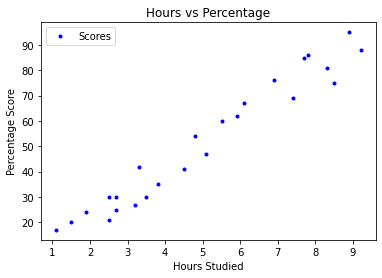

In [5]:
data.plot(x='Hours', y='Scores', style='.', color = 'blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing Data

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training Model

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor)

LinearRegression()


### Plotting Regression Line

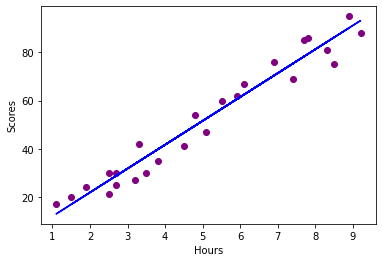

In [10]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y, color = 'purple')
plt.plot(X, line, color = 'blue');
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Making Predictions after traing the Model


In [40]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Actual Data vs Predicted Data

In [28]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dt 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicted Score if a student studies for 9.25 hrs/day

In [50]:
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Checking the Performance and Accuracy of Model

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [55]:
train_perc = regressor.score(X_train, y_train)*100
test_perc = regressor.score(X_test, y_test)*100
print('Training Accuracy: ', train_perc)
print('Testing Accuracy: ', test_perc)

Training Accuracy:  95.15510725211553
Testing Accuracy:  94.54906892105353
